# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue

> **The questions**: 
How is the production volume changed through years?     
What kinds of properties are associated with movies that have high revenues?


In [66]:
# Use this cell to set up import statements for all of the packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [21]:
# Load dataset
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning 
> columns like ['imdb_id', 'homepage','release_date','tagline','keywords','production_companies','overview'] will not be necessary for the analysis, so just drop them. also the ['production companies'] has a lot of nulls, which might be nit helpful alhuogh it could affect the movies quality



In [22]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['imdb_id', 'homepage','release_date','tagline','keywords','production_companies','overview'], axis = 1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


> Small number of rows has missing data, drop it it will not affect the overall numbers

In [34]:
df.dropna(inplace=True)
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 14 columns):
id                10732 non-null int64
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
budget_adj        10732 non-null float64
revenue_adj       10732 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (How is the production volume changed through years?  )

In [107]:
budget_by_60s = df.query('release_year >= 1960 and release_year < 1970').budget.sum()
budget_by_70s = df.query('release_year >= 1970 and release_year < 1980').budget.sum()
budget_by_80s = df.query('release_year >= 1980 and release_year < 1990').budget.sum()
budget_by_90s = df.query('release_year >= 1990 and release_year < 2000').budget.sum()
budget_by_00s = df.query('release_year >= 2000 and release_year < 2010').budget.sum()
budget_by_10s = df.query('release_year >= 2010 and release_year <= 2015').budget.sum()

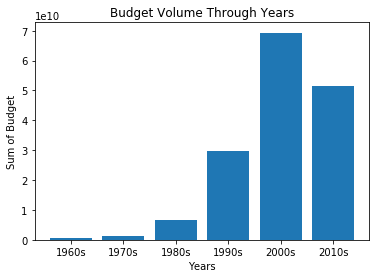

In [108]:
plt.bar(["1960s", "1970s","1980s","1990s","2000s","2010s",], [budget_by_60s,budget_by_70s,budget_by_80s,budget_by_90s,budget_by_00s,budget_by_10s])
plt.title("Budget Volume Through Years")
plt.xlabel("Years")
plt.ylabel("Sum of Budget");

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [73]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10732.000000,10732.000000,1.073200e+04,1.073200e+04,10732.000000,10732.000000,10732.000000,10732.000000,1.073200e+04,1.073200e+04
mean,65199.598025,0.652609,1.480506e+07,4.031622e+07,102.467853,219.802739,5.964620,2001.260436,1.776644e+07,5.200147e+07
std,91466.515616,1.004757,3.106345e+07,1.176476e+08,30.492619,578.789325,0.930286,12.819831,3.446490e+07,1.454192e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10547.750000,0.210766,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20331.000000,0.387136,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73943.750000,0.720621,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000,2.111556e+07,3.470526e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [98]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000
mean,65199.598025,0.652609,14805062.129333,40316220.714406,102.467853,219.802739,5.964620,2001.260436,17766443.293138,52001473.638288
std,91466.515616,1.004757,31063454.863048,117647552.196793,30.492619,578.789325,0.930286,12.819831,34464897.996315,145419212.436827
min,5.000000,0.000188,0.000000,0.000000,0.000000,10.000000,1.500000,1960.000000,0.000000,0.000000
25%,10547.750000,0.210766,0.000000,0.000000,90.000000,17.000000,5.400000,1995.000000,0.000000,0.000000
50%,20331.000000,0.387136,0.000000,0.000000,99.000000,39.000000,6.000000,2006.000000,0.000000,0.000000
75%,73943.750000,0.720621,16000000.000000,25000000.000000,112.000000,148.000000,6.600000,2011.000000,21115558.479979,34705259.920131
max,417859.000000,32.985763,425000000.000000,2781505847.000000,900.000000,9767.000000,9.200000,2015.000000,425000000.000000,2827123750.411890


In [117]:
high_rev_movies=df.query('revenue >= 25000000')
high_rev_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


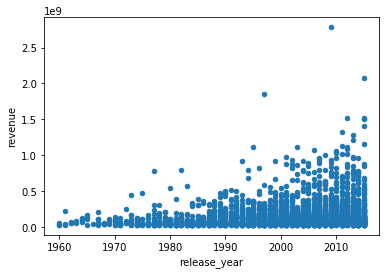

In [122]:
high_rev_movies.plot(x='release_year', y='revenue', kind='scatter');

there is clear positive correlation between the revenue and years

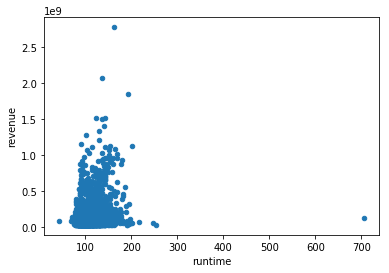

In [123]:
high_rev_movies.plot(x='runtime', y='revenue', kind='scatter');

long movies don't really help the revenue

<a id='conclusions'></a>
## Conclusions

> through this data we can see that production has gave the movie industry much more inerest and budget with the begining of the new millennium. that decreased in the following five years but still more than 1900's in general

>So apperently the movie production got more popular through years and the overall revenue increased 

>Movies with more than 2.30 hours run time haven't got alot of watching although some of them got higher revenue
but defently not those are more than 3 hours run time



In [124]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0